<div class="alert alert-block alert-warning">
<span style="color: rgb(0,53,91);">
<center><img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><center>Ejercicio 1: Convolución de Imágenes</center></font></b>
<div align="right"><font face = "Times New Roman" size = "2">Dr. Iván Esteban Villalón Turrubiates (villalon@iteso.mx)</font></div>
</span></div>

#### Nombre del Alumno: 
#### Matrícula: 

#### Instrucciones:
Por favor, revisa cuidadosamente las siguientes instrucciones:

* Realiza este ejercicio de manera individual.
* Escribe tu nombre completo y matrícula en la celda correspondiente.
* Lee cuidadosamente cada uno de los ejercicios y realiza las acciones solicitadas.
* Coloca tu código ejecutable en las celdas debajo de la explicación de cada reactivo.
* Una vez terminado, sube en CANVAS sólamente el archivo `.ipynb` en la liga correspondiente.

#### Explicación:
Se realizará la aplicación de un filtro a una imagen **RGB** por medio de la operación de **Convolución**.

<center><img src="./Imagenes/ConvIma.png" style="width:730px;height:223px;" class="center"></center>

Para ello, se debe realizar el proceso de análisis por medio de los reactivos descritos a continuación, donde cada uno tiene un valor de **5 CRÉDITOS**, los cuales se agregarán al total acumulado de cada uno de los alumnos del curso.

**1.** Cargar las librerías **Scikit-Image**, **NumPy** y **Matplotlib** que serán empleadas. Posteriormente, cargar una imagen desde un archivo, la cual puede tener dimensiones distintas a *512x512* pixeles:

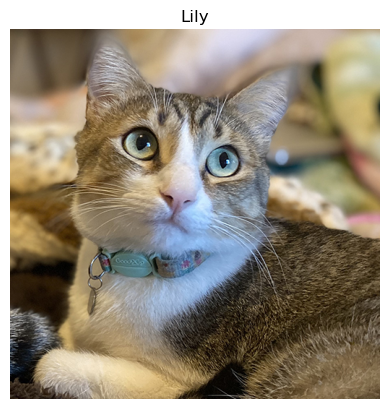

In [1]:
# Código del Reactivo 1

#Importación de Librerías
from skimage import io 
import numpy as np  
import matplotlib.pyplot as plt                                                 

#Lectura de la Imagen desde un archivo JPG
Lily = io.imread("./Imagenes/Lily.jpg")   

#Asignación de los valores del número de renglones, columnas y bandas en la imagen
R = Lily.shape[0]                        
C = Lily.shape[1]                        
B = Lily.shape[2]  

#Impresión de la Imagen
plt.imshow(Lily)
plt.axis('off')
plt.title("Lily")
plt.show()

**2.** Definir la **Matriz de Convolución** como un arreglo de **NumPy**, la cual será utilizada como filtro para la imagen. Esta matriz debe tener una dimensión de ***7x7***:

In [12]:
# Código del Reactivo 2

#Matriz de Convolución como Filtro
Filtro = np.array([[-1, -1, -1, 2, 4, 9, 0],
                   [0, 0, 0, 1, 8, 10, 20],
                   [-1, -1, -8, -1, -3, -1, -1],
                   [2, -16, 1, 1, 1, 0, 1],
                   [-1, 0, 1, -1, -1, 0, 1],
                   [0, 0, 0, 0, 0, 0, 0],
                   [5, 30, -6, 13, 45, 10, 1],]) 

**3.** Definir la función de **Convolución** que será empleada, considerando que el filtro es una matriz de ***7x7***:

In [6]:
# Código del Reactivo 3

#Función para la Convolución
def convolucion(Imagen,Filtro):
    Conv = np.zeros((R,C,B))
    for b in range(0,B):
        for r in range(3,508+1):
            for c in range(3,508+1):
                Ventana = np.array(Imagen[r-3:r+4, c-3:c+4, b])    #Formación de la Ventana
                Multiplica = np.matmul(Ventana,Filtro)             #Multiplicación de Ventana y Filtro
                Suma = np.sum(Multiplica)                          #Suma de los Valores
                Conv[r,c,b] = Suma                                 #Asignación a la Matriz de Convolución
    return Conv

**4.** Definir la función de **Normalización** que será empleada, considerando que el filtro es una matriz de ***7x7*** y que se deben realizar las operaciones de normalización, escalamiento a 256 valores, y conversión a valores enteros:

In [4]:
# Código del Reactivo 4

#Función para la Normalización
def normalizacion(Imagen):
    #Inicializacion de la matriz normalizada
    ImaNormal=np.zeros((R,C,B))

    #Valores maximo y minimo para la banda R
    max_r=np.max(Imagen[:,:,0])
    min_r=np.min(Imagen[:,:,0])

    #Valores maximo y minimo para la banda G
    max_g=np.max(Imagen[:,:,1])
    min_g=np.min(Imagen[:,:,1])

    #Valores maximo y minimo para la banda B
    max_b=np.max(Imagen[:,:,2])
    min_b=np.min(Imagen[:,:,2])

    #Normalización de la imagen con ruido
    for i in range(0,R):                     
        for j in range(0,C):
            ImaNormal[i,j,0] = (Imagen[i,j,0] - min_r) / (max_r - min_r)
            ImaNormal[i,j,1] = (Imagen[i,j,1] - min_g) / (max_g - min_g)
            ImaNormal[i,j,2] = (Imagen[i,j,2] - min_b) / (max_b - min_b)

    #Escalamiento a escala de 0 a 255 (8 bits)
    ImaNormal8 = ImaNormal[:,:,:] * 255      

    #Imagen final con valores enteros
    ImaFinal = np.uint8(ImaNormal8)   

    return ImaFinal

**5.** Aplicar el filtro por medio de la operación de **Convolución** a la imagen del *reactivo 1* y posteriormente su normalización, mostrando el resultado y guardando una copia en formato ***JPG***:

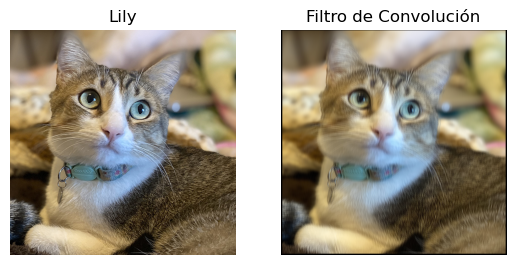

In [13]:
# Código del Reactivo 5

#Determinación de la Convolución
Conv = convolucion(Lily, Filtro)

#Determinación de la Normalización
ImaConv = normalizacion(Conv)

#Impresión del Filtro Detector de Bordes de Canny
plt.subplot(1,2,1), plt.imshow(Lily), plt.axis('off'), plt.title("Lily")
plt.subplot(1,2,2), plt.imshow(ImaConv), plt.axis('off'), plt.title("Filtro de Convolución")
plt.imsave('./ImaConv_DBC.jpg', ImaConv)
plt.show()

<div class="alert alert-block alert-danger">
<b>.: Fin del Ejercicio 1 :.</b>
</div>